In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

In [129]:
concrete = pd.read_csv('datasets/concrete_data.csv')

concrete.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [130]:
X = concrete.drop('csMPa', axis=1)

Y = concrete['csMPa']

In [131]:
X = X.drop(['flyash', 'coarseaggregate', 'fineaggregate'], axis=1)

In [132]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [133]:
baseline = GradientBoostingRegressor(max_depth=3, n_estimators=50)
baseline.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [134]:
y_pred = baseline.predict(x_test)

r2_score(y_test, y_pred)

0.8731732354446234

In [135]:
important_features = pd.Series(baseline.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)

important_features

age                 0.380125
cement              0.337050
slag                0.103247
superplasticizer    0.100637
water               0.078941
dtype: float64

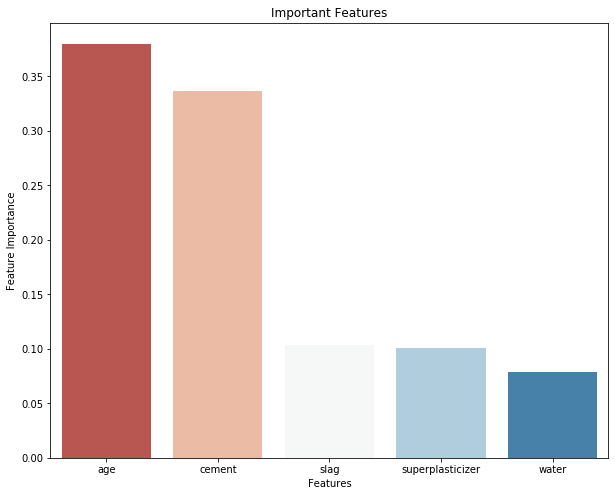

In [136]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot( x = important_features.index, y = important_features, palette = "RdBu")

plt.xlabel('Features')
plt.ylabel('Feature Importance')

plt.title("Important Features")
plt.show()

In [137]:
gbr = GradientBoostingRegressor(max_depth=3)

In [138]:
parameters = {'n_estimators': [1, 5, 10, 50, 100, 200, 300, 400, 500]}

gridsearch_reg = GridSearchCV(estimator=gbr, param_grid=parameters, cv=3)

In [139]:
gridsearch_reg.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [140]:
gridsearch_reg.best_params_

{'n_estimators': 500}

In [141]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [142]:
gbr = GradientBoostingRegressor(max_depth=3, 
                                n_estimators = gridsearch_reg.best_params_['n_estimators'])

gbr_best.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=547,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [143]:
y_pred = gbr_best.predict(x_test)

r2_score(y_test, y_pred)

0.932166805760244

In [144]:
gbr = GradientBoostingRegressor(max_depth=3, warm_start=True)

### Tuning for n_estimators
warm_start=True  allows you to add more estimators to an already fitted model.

In [145]:
min_val_error = float("inf")
error_increasing = 0

for n_estimators in range(1, 1000):
    gbr.n_estimators = n_estimators
    gbr.fit(x_train, y_train)
    
    y_pred = gbr.predict(x_test)
    val_error = mean_squared_error(y_test, y_pred)
    
    print('No. of estimators: ', gbr.n_estimators_)
    print('Validation error: ', val_error)
    
    if val_error < min_val_error:
        min_val_error = val_error
        error_increasing = 0
    else:
        error_increasing += 1
        if error_increasing == 10:
            break

No. of estimators:  1
Validation error:  252.00500292420253
No. of estimators:  2
Validation error:  220.54386597078278
No. of estimators:  3
Validation error:  194.5640431170519
No. of estimators:  4
Validation error:  172.3967476771114
No. of estimators:  5
Validation error:  156.14374976388925
No. of estimators:  6
Validation error:  140.65576293562896
No. of estimators:  7
Validation error:  127.3695943934677
No. of estimators:  8
Validation error:  115.48626585906204
No. of estimators:  9
Validation error:  107.68591696120829
No. of estimators:  10
Validation error:  98.92701215741343
No. of estimators:  11
Validation error:  92.90933480351283
No. of estimators:  12
Validation error:  86.0060659581435
No. of estimators:  13
Validation error:  81.1073075003579
No. of estimators:  14
Validation error:  75.29154488892067
No. of estimators:  15
Validation error:  70.4895205844529
No. of estimators:  16
Validation error:  66.58670921150987
No. of estimators:  17
Validation error:  63.6

No. of estimators:  143
Validation error:  26.180011024581006
No. of estimators:  144
Validation error:  26.178347290021502
No. of estimators:  145
Validation error:  26.210335563480058
No. of estimators:  146
Validation error:  26.177053999561483
No. of estimators:  147
Validation error:  26.117863222296762
No. of estimators:  148
Validation error:  26.13453824025121
No. of estimators:  149
Validation error:  26.131622764522998
No. of estimators:  150
Validation error:  26.13992173537537
No. of estimators:  151
Validation error:  26.096413154923265
No. of estimators:  152
Validation error:  26.077357441794497
No. of estimators:  153
Validation error:  26.039803577935196
No. of estimators:  154
Validation error:  26.003507788943928
No. of estimators:  155
Validation error:  25.96649326172836
No. of estimators:  156
Validation error:  25.847381837030856
No. of estimators:  157
Validation error:  25.8279916730335
No. of estimators:  158
Validation error:  25.765554172200787
No. of estima

In [146]:
n_estimators

269

In [147]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [148]:
gbr_best = GradientBoostingRegressor(max_depth=3,
                                     n_estimators = n_estimators)

In [149]:
gbr_best.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=269,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [150]:
y_pred = gbr_best.predict(x_test)

r2_score(y_test, y_pred)

0.9354671812086064